In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [5]:
df = pd.read_excel('EastWestAirlines.xlsx')

In [6]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
# Datatypes of columns
df.dtypes


ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [8]:
# Statistical summary of dataset
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
# null and missing values in dataset
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x12a748510>,
 'caps': [<matplotlib.lines.Line2D at 0x12a467810>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a74b9d0>,
 'medians': [<matplotlib.lines.Line2D at 0x12a7a1750>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a7a0e50>,
 'means': []}

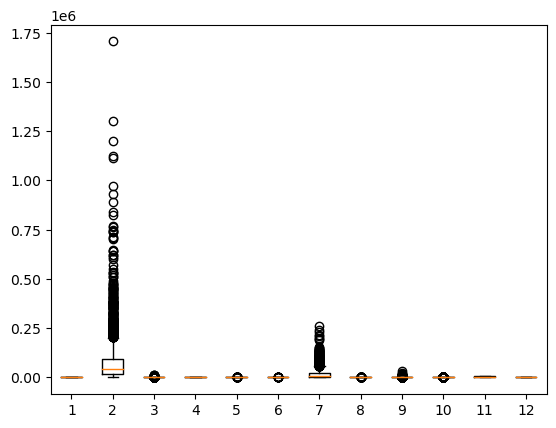

In [10]:
plt.boxplot(df)

In [11]:
# From the above graph we can interpret that column 2 and 7 have maximum number of outliers

In [12]:
# We will be using IQR to remove outliers across dataset

In [13]:
def determine_outlier_thresholds_iqr(dataframe, col_name, th1, th3):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

In [14]:
# Calling the function for Balance column
th1=0.25
th3=0.75
low,upper = determine_outlier_thresholds_iqr(df,"Balance",th1,th3)

In [15]:
df.loc[(df['Balance'] < low), 'Balance'] = low
df.loc[(df['Balance'] > upper), 'Balance'] = upper

<Axes: >

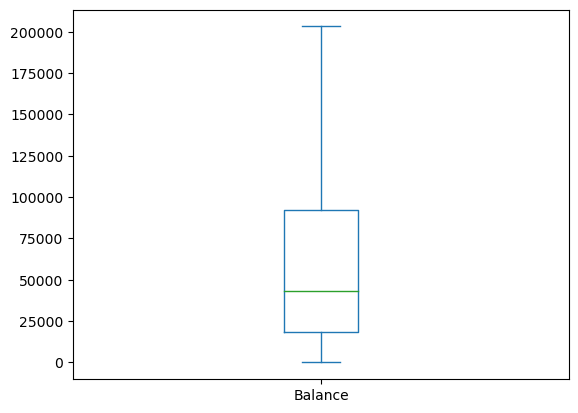

In [16]:
# outliers are removed
df['Balance'].plot.box()

In [17]:
# Similarly removing outliers for column 7 
th1=0.25
th3=0.75
low1,upper1 = determine_outlier_thresholds_iqr(df,"Bonus_miles",th1,th3)

In [18]:
df.loc[(df['Bonus_miles'] < low1), 'Bonus_miles'] = low1
df.loc[(df['Bonus_miles'] > upper1), 'Bonus_miles'] = upper1

<Axes: >

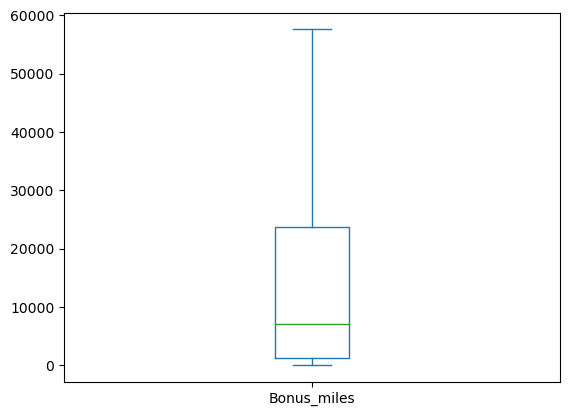

In [19]:
# Outliers are removed
df['Bonus_miles'].plot.box()

/Users/rmanoj/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


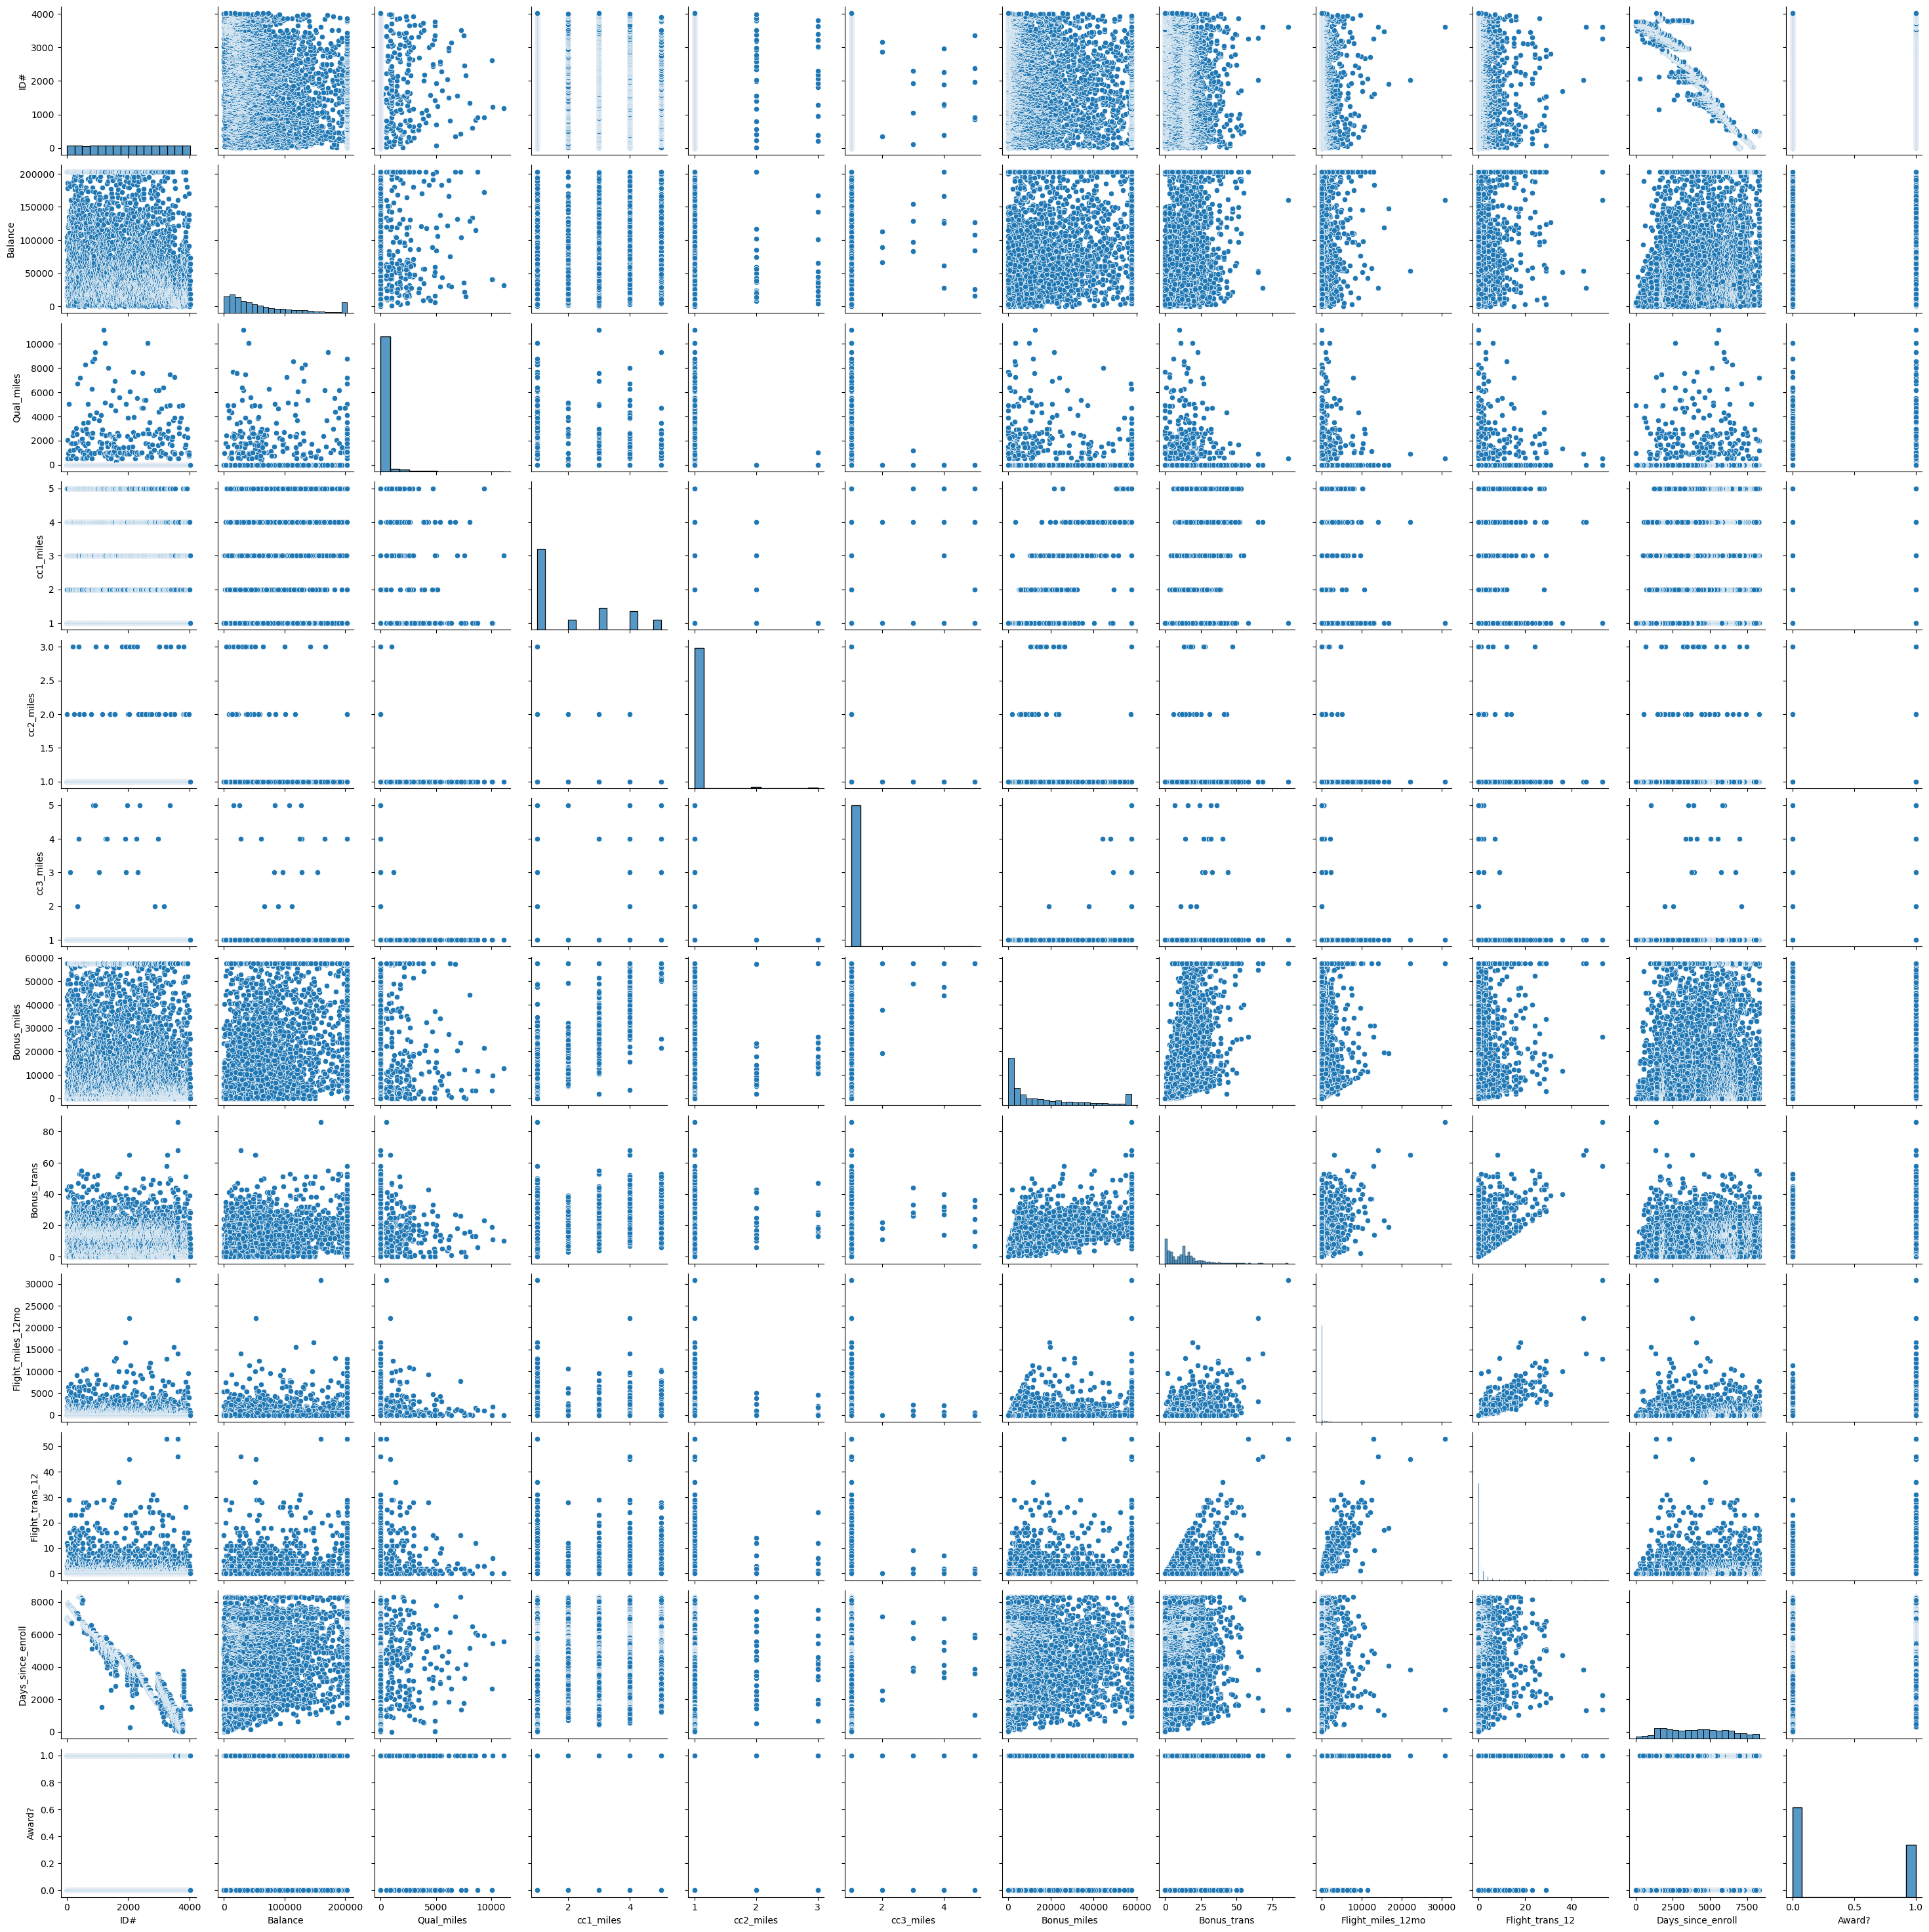

In [20]:
# Pair plot for the dataset
snb.pairplot(df)

<Axes: >

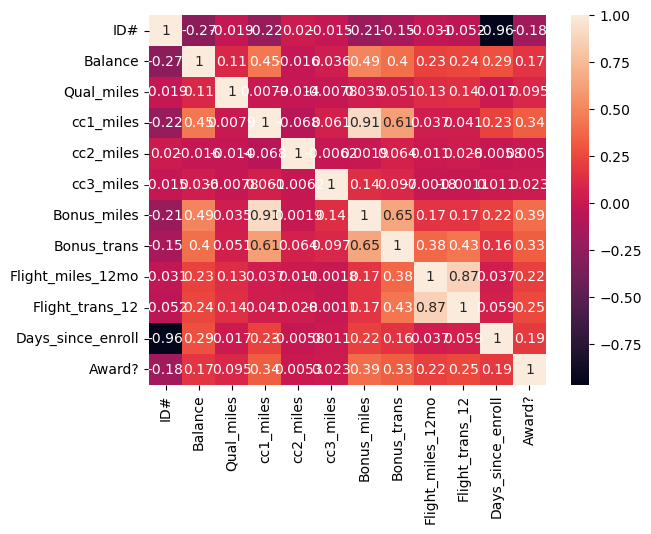

In [21]:
# Heatmap
snb.heatmap(df.corr(),annot=True)

In [22]:
# Performing K Means
from sklearn.cluster import KMeans

In [23]:
model = KMeans(n_clusters=3)

In [24]:
model.fit(df)

/Users/rmanoj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [25]:
model.inertia_

2452311067378.8438

In [26]:
# We will determine the best number of clusters using elbow method
ls=[]
for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(df)
    ls.append(model.inertia_)

/Users/rmanoj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rmanoj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rmanoj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rmanoj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

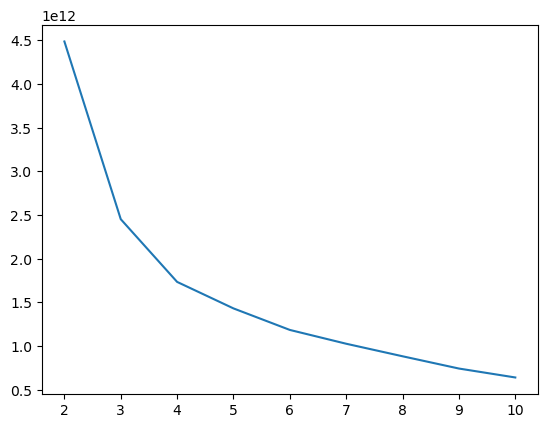

In [27]:
plt.plot(np.arange(2,11),ls)

In [28]:
# From the above graph we can conclude 4 might be the ideal number of clusters 

In [29]:
# Visualizing the clusters for n=4
kmeans_cluster = KMeans(init="random", n_clusters=4, n_init=10, random_state=0)

In [30]:

kmeans_cluster.fit(df)

KMeans(init='random', n_clusters=4, n_init=10, random_state=0)

In [31]:
# Finding centroids
centroids = kmeans_cluster.cluster_centers_ 

In [32]:
label = kmeans_cluster.fit_predict(df) 

In [33]:
unique_labels = np.unique(label)

In [34]:
x = df.values

In [35]:
x

array([[1.0000e+00, 2.8143e+04, 0.0000e+00, ..., 0.0000e+00, 7.0000e+03,
        0.0000e+00],
       [2.0000e+00, 1.9244e+04, 0.0000e+00, ..., 0.0000e+00, 6.9680e+03,
        0.0000e+00],
       [3.0000e+00, 4.1354e+04, 0.0000e+00, ..., 0.0000e+00, 7.0340e+03,
        0.0000e+00],
       ...,
       [4.0190e+03, 7.3597e+04, 0.0000e+00, ..., 0.0000e+00, 1.4020e+03,
        1.0000e+00],
       [4.0200e+03, 5.4899e+04, 0.0000e+00, ..., 1.0000e+00, 1.4010e+03,
        0.0000e+00],
       [4.0210e+03, 3.0160e+03, 0.0000e+00, ..., 0.0000e+00, 1.3980e+03,
        0.0000e+00]])

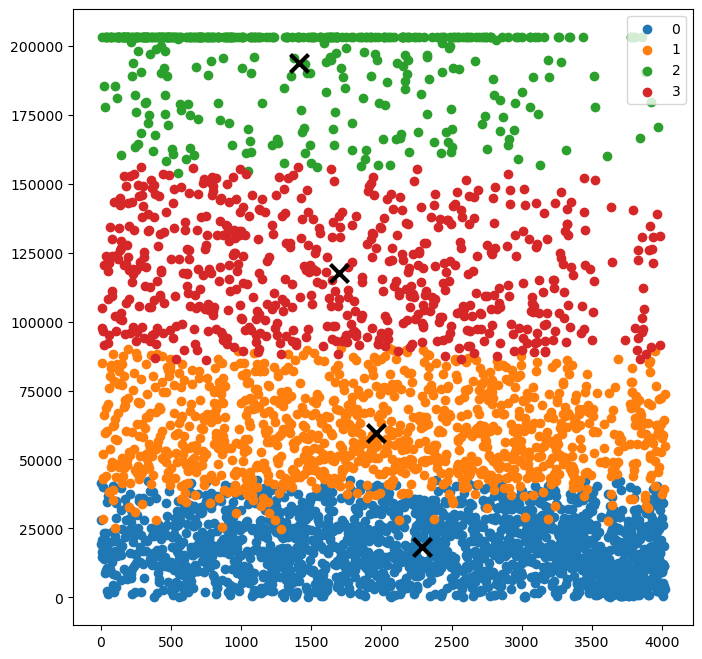

In [36]:
# Plotting the clusters
plt.figure(figsize=(8, 8)) 
for i in unique_labels: 
    plt.scatter(x[label==i, 0], x[label==i, 1], label=i) 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='k', zorder=10) 
plt.legend() 
plt.show() 

In [58]:
# Computing silhouette score 
from sklearn.metrics import silhouette_score
silhouette_score(x,label)

0.4838936303172429

In [37]:
# Hierarchical Clustering

In [38]:
# creating dendograms to obtain the correct number of clusters 

In [39]:
import scipy.cluster.hierarchy as sc

Text(0.5, 1.0, 'Dendogram')

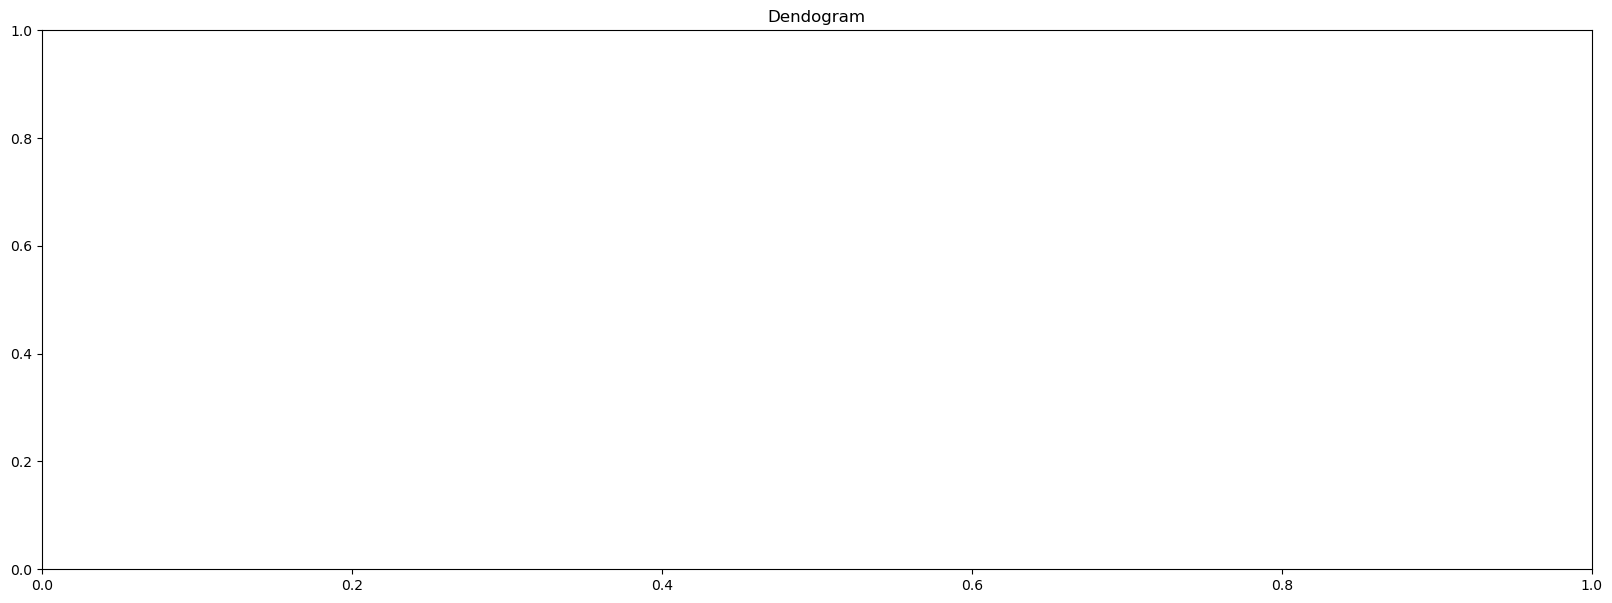

In [40]:
plt.figure(figsize=(20,7))
plt.title("Dendogram")

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [95.0, 95.0, 105.0, 105.0],
  [63.75, 63.75, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [81.875, 81.875, 122.5, 122.5],
  [14.375, 14.375, 102.1875, 102.1875],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [170.0, 170.0, 200.0, 200.0],
  [145.0, 145.0, 185.0, 185.0],
  [58.28125, 58.28125, 165.0, 165.0],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [220.0, 220.0, 242.5, 242.5],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  [322.5, 32

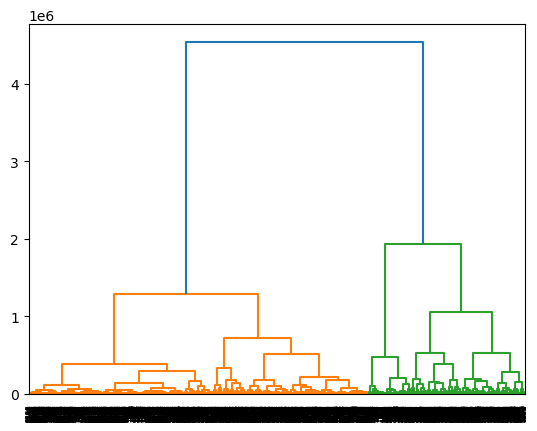

In [42]:
sc.dendrogram(sc.linkage(df, method='ward'))

In [43]:
# From the above dendogram we choose number of clusters as 2

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [46]:
cluster.fit(df)

/Users/rmanoj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [47]:
labels=cluster.labels_

In [48]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
# visualizing the cluster

In [54]:
# converted the dataframe to numpy array for ease of plotting
x = df.values

In [55]:
x

array([[1.0000e+00, 2.8143e+04, 0.0000e+00, ..., 0.0000e+00, 7.0000e+03,
        0.0000e+00],
       [2.0000e+00, 1.9244e+04, 0.0000e+00, ..., 0.0000e+00, 6.9680e+03,
        0.0000e+00],
       [3.0000e+00, 4.1354e+04, 0.0000e+00, ..., 0.0000e+00, 7.0340e+03,
        0.0000e+00],
       ...,
       [4.0190e+03, 7.3597e+04, 0.0000e+00, ..., 0.0000e+00, 1.4020e+03,
        1.0000e+00],
       [4.0200e+03, 5.4899e+04, 0.0000e+00, ..., 1.0000e+00, 1.4010e+03,
        0.0000e+00],
       [4.0210e+03, 3.0160e+03, 0.0000e+00, ..., 0.0000e+00, 1.3980e+03,
        0.0000e+00]])

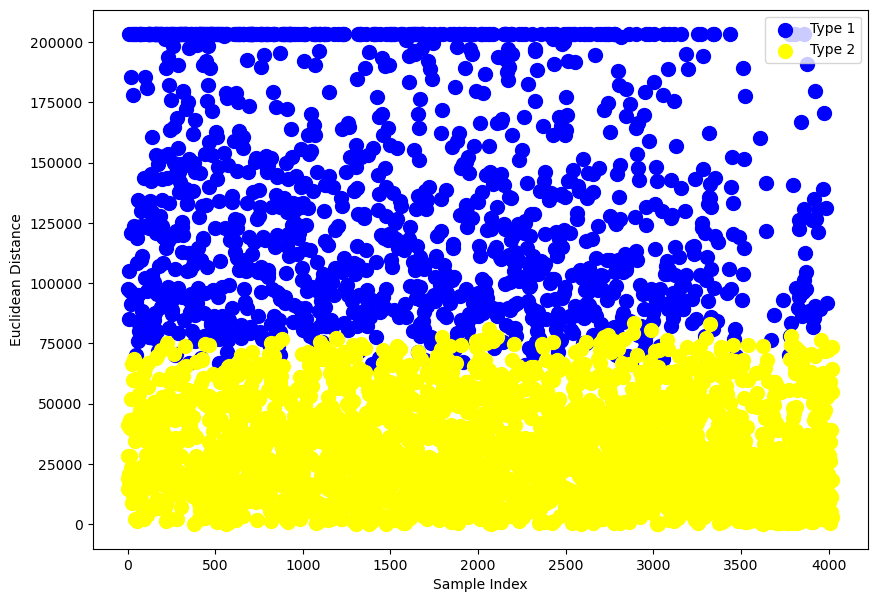

In [56]:
plt.figure(figsize=(10, 7))
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = 100, c = 'blue', label = 'Type 1')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = 100, c = 'yellow', label = 'Type 2')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [59]:
# DBSCAN clustering

In [121]:
# we will be determing the optimal number for parameters eps and min pts. Let us take min_samples = 24
# we will be using nearest neighbours 

In [122]:
from sklearn.neighbors import NearestNeighbors

In [137]:
neighbors = NearestNeighbors(n_neighbors=24)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

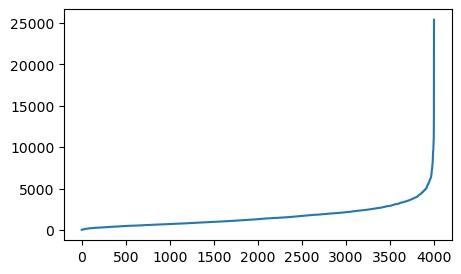

In [138]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,3))
plt.plot(distances)

In [139]:
# Let us consider eps as 4000

In [176]:
db = DBSCAN(eps=4900,min_samples=35).fit(df)

In [181]:
lab = db.labels_
un = np.unique(lab)

In [178]:
no_clusters = len(np.unique(lab))

In [179]:
no_clusters

4

['y', 'b', 'g', 'r']


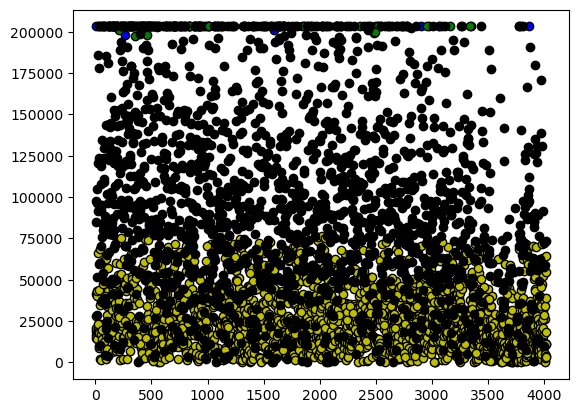

In [184]:
# visualization 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(lab)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
 
    class_member_mask = (lab == k)
 
    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 

In [180]:
silhouette_score(df,lab)

0.3480519819276917